# Setup

In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FastICA

import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

Data A

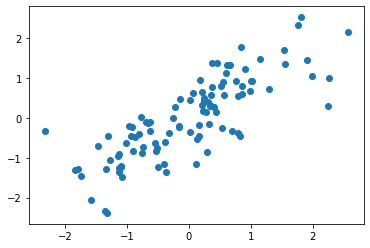

<IPython.core.display.Javascript object>

In [3]:
df = make_blobs(
    n_samples=100,
    n_features=2,
    centers=[[10, 5]],
    cluster_std=[[3, 2]],
    random_state=8675309,
)[0]
df = pd.DataFrame(df, columns=["x", "y"])

# Put some trend into the y component
df = df.sort_values("x").reset_index(drop=True)
df["y"] += df.index / 10

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=["x", "y"])
df_scaled.head()

plt.scatter(df_scaled["x"], df_scaled["y"])
plt.show()

Data B

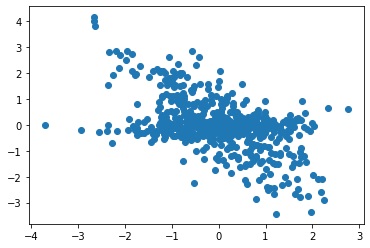

<IPython.core.display.Javascript object>

In [4]:
def gen_correlated(x_mean, y_mean, x_std, y_std, corr, n=1000):
    covs = [
        [x_std ** 2, x_std * y_std * corr],
        [x_std * y_std * corr, y_std ** 2],
    ]
    xy = np.random.multivariate_normal([x_mean, y_mean], covs, n).T

    return xy.T


axy = gen_correlated(0, 0, 10, 10, corr=-0.8, n=300)
bxy = gen_correlated(0, 0, 10, 2, corr=0.3, n=300)
xy = np.vstack((axy, bxy))

df = pd.DataFrame(xy, columns=["x", "y"])

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=["x", "y"])
df_scaled.head()

plt.scatter(df_scaled["x"], df_scaled["y"])
plt.show()

## PCA

In [5]:
pca = PCA(n_components=2)

# If in supervised pipeline:
#   * fit and transform training data
#   * transform testing/new data using learnings from the trained fit
pca.fit(df_scaled)
pcs = pca.transform(df_scaled)
pcs.shape

(600, 2)

<IPython.core.display.Javascript object>

In [6]:
pca.explained_variance_ratio_

array([0.75723019, 0.24276981])

<IPython.core.display.Javascript object>

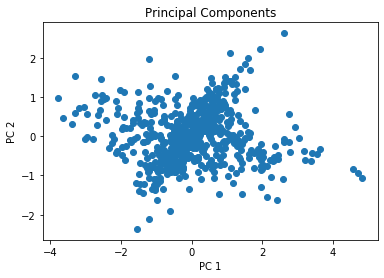

<IPython.core.display.Javascript object>

In [7]:
plt.scatter(pcs[:, 0], pcs[:, 1])
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("Principal Components")
plt.show()

## ICA

In [9]:
ica = FastICA(n_components=2)

# If in supervised pipeline:
#   * fit and transform training data
#   * transform testing/new data using learnings from the trained fit
ica.fit(df_scaled)
ics = ica.transform(df_scaled)
ics.shape

(600, 2)

<IPython.core.display.Javascript object>

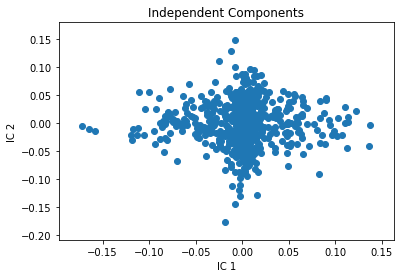

<IPython.core.display.Javascript object>

In [10]:
plt.scatter(ics[:, 0], ics[:, 1])
plt.xlabel("IC 1")
plt.ylabel("IC 2")
plt.title("Independent Components")
plt.show()

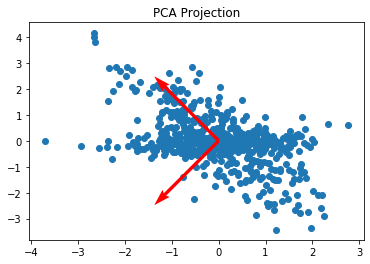

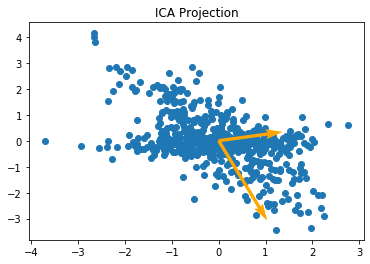

<IPython.core.display.Javascript object>

In [11]:
df_x, df_y = df_scaled["x"], df_scaled["y"]

pca_std = pca.components_.T / pca.components_.T.std()
pca_x, pca_y = pca_std

ica_std = ica.mixing_ / ica.mixing_.std()
ica_x, ica_y = ica_std


plt.scatter(df_x, df_y)
plt.quiver(0, 0, pca_x, pca_y, zorder=11, width=0.01, scale=6, color="red")
plt.title("PCA Projection")
plt.show()

plt.scatter(df_x, df_y)
plt.quiver(0, 0, ica_x, ica_y, zorder=11, width=0.01, scale=6, color="orange")
plt.title("ICA Projection")
plt.show()